# Glass Type Classification Using Supervised Learning

In this notebook, we’ll build a machine learning pipeline to classify different types of glass based on their chemical composition.

### Goals:
1. Perform Exploratory Data Analysis (EDA)
2. Preprocess and scale the data
3. Train multiple classification models
4. Evaluate and compare their performance
5. Summarize the best model and key insights


In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

sns.set(style="whitegrid")


In [2]:
# Step 2: Load the Glass Dataset
df = pd.read_csv("glass_dataset.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Missing values in the dataset:
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


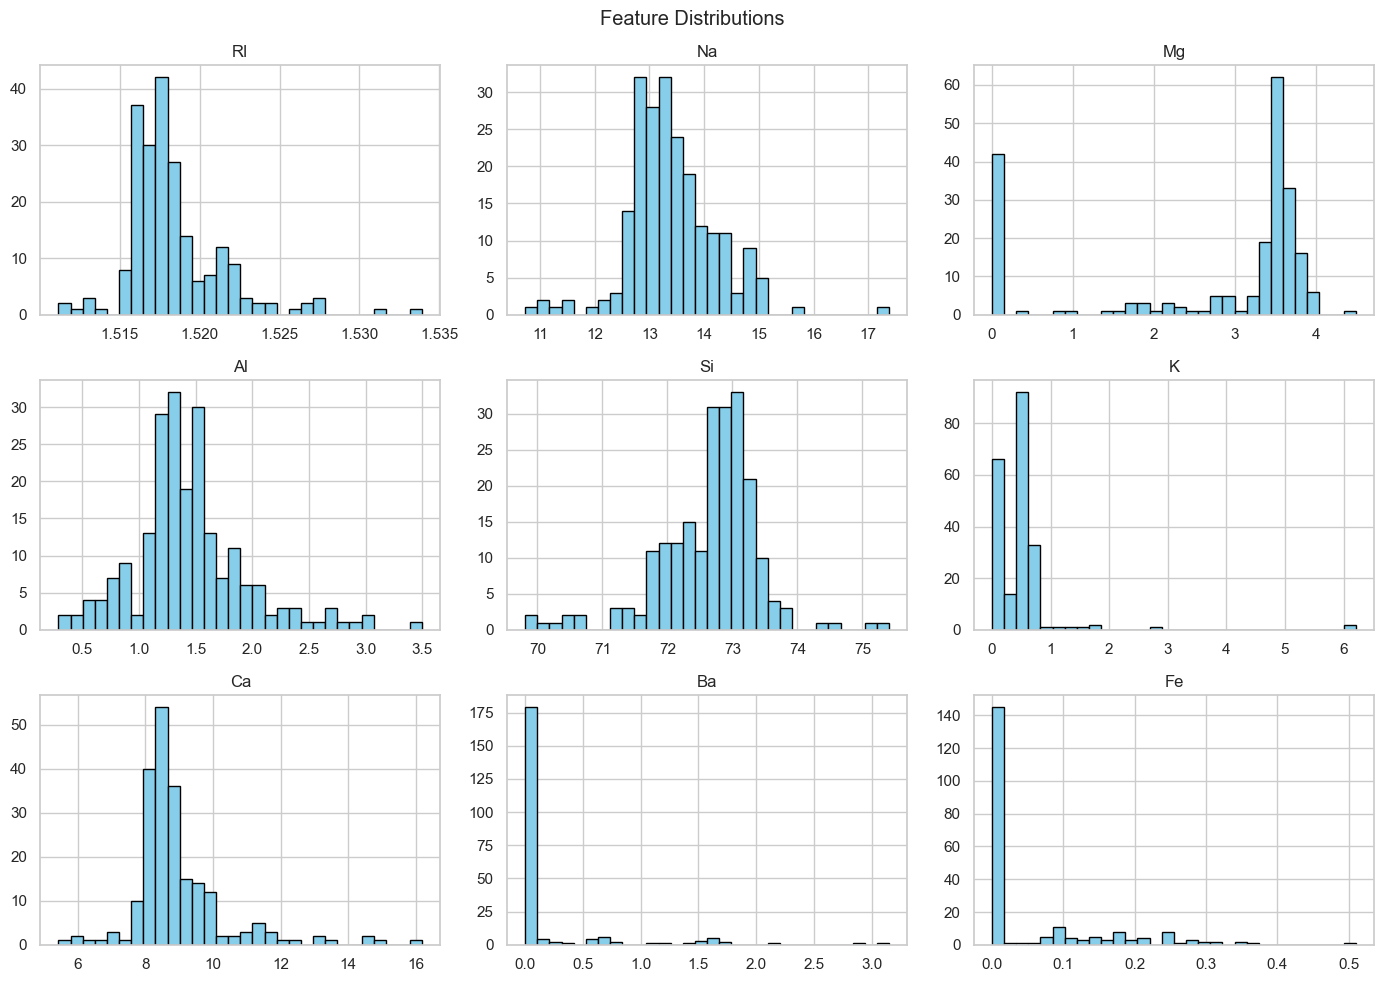

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9904\3143366149.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Type", palette="Set2")


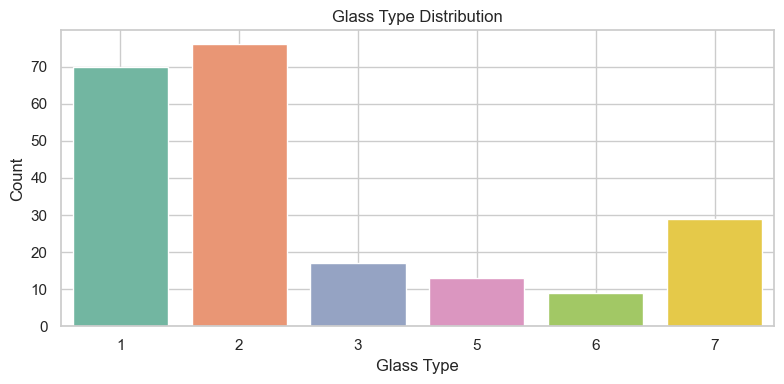

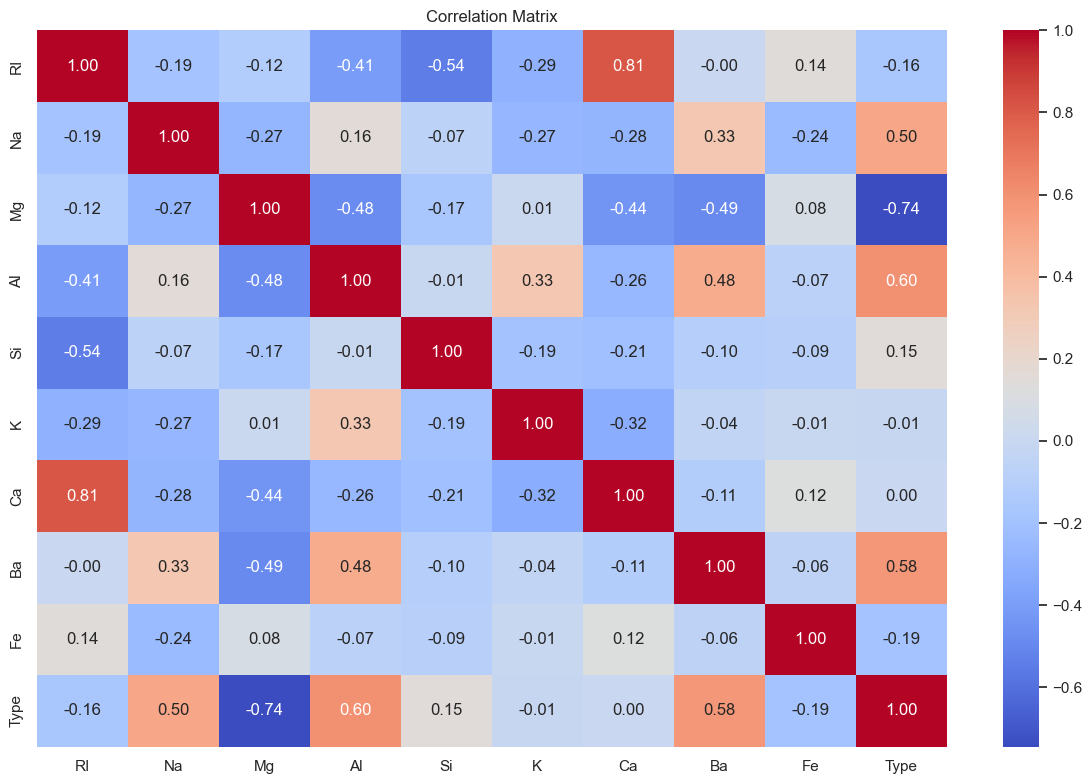

In [3]:
# Step 3: Exploratory Data Analysis (EDA)

# Check for missing values
print("Missing values in the dataset:")
print(df.isnull().sum())

# Visualize feature distributions
df.drop("Type", axis=1).hist(bins=30, figsize=(14, 10), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()

# Visualize class distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="Type", palette="Set2")
plt.title("Glass Type Distribution")
plt.xlabel("Glass Type")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [4]:
# Step 4: Data Preprocessing

# Separate features and target
X = df.drop("Type", axis=1)
y = df["Type"]

# Normalize features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets (stratify to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (171, 9)
Test shape: (43, 9)


In [5]:
# Step 5: Train Multiple Classification Models

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "report": classification_report(y_test, y_pred, output_dict=True),
        "confusion": confusion_matrix(y_test, y_pred)
    }

# Create a summary table
summary = []
for name, res in results.items():
    rep = res["report"]
    summary.append({
        "Model": name,
        "Accuracy": rep["accuracy"],
        "Precision (macro avg)": rep["macro avg"]["precision"],
        "Recall (macro avg)": rep["macro avg"]["recall"],
        "F1-score (macro avg)": rep["macro avg"]["f1-score"]
    })

summary_df = pd.DataFrame(summary).sort_values(by="F1-score (macro avg)", ascending=False).reset_index(drop=True)
summary_df

c:\Users\Usuario\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Usuario\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Usuario\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

,Model,Accuracy,Precision (macro avg),Recall (macro avg),F1-score (macro avg)
0,Random Forest,0.813953,0.821581,0.820635,0.808730
1,Logistic Regression,0.744186,0.678075,0.741270,0.703994
2,SVM,0.720930,0.622024,0.614286,0.611015
3,KNN,0.697674,0.618954,0.586508,0.586258


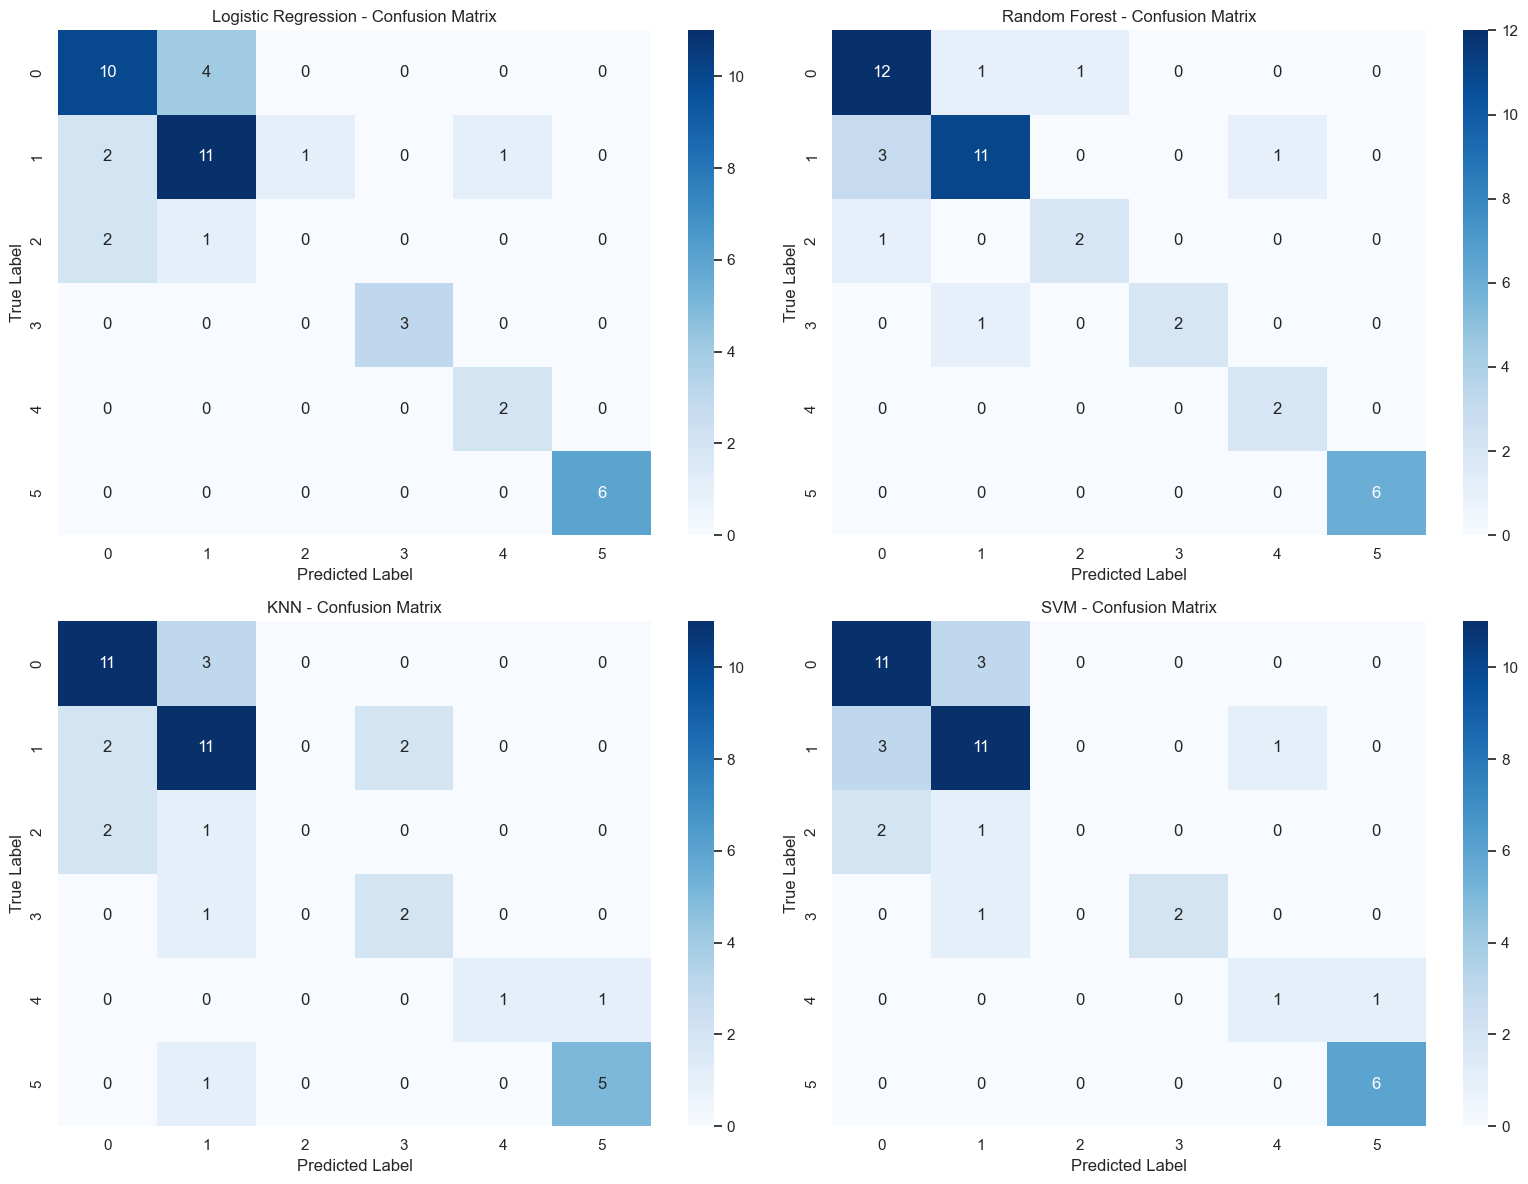

In [6]:
# Step 6: Visualize Confusion Matrices for Each Model

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, (name, res) in enumerate(results.items()):
    sns.heatmap(res["confusion"], annot=True, fmt="d", cmap="Blues", ax=axes[idx])
    axes[idx].set_title(f"{name} - Confusion Matrix")
    axes[idx].set_xlabel("Predicted Label")
    axes[idx].set_ylabel("True Label")

plt.tight_layout()
plt.show()

## Conclusion and Insights

- **Random Forest** performed the best with an F1-score of over 80%, thanks to its ability to handle complex patterns and feature interactions.
- **Logistic Regression** gave a strong linear baseline.
- **SVM and KNN** had slightly lower scores and struggled with minority classes.
- We noticed that class imbalance and rare glass types (like 6 and 7) made it harder for some models to perform well — class weighting or SMOTE could be explored next.
- Feature scaling helped ensure fair comparisons across models.

This workflow gives us a good foundation to deploy a basic glass classification system.